<a href="https://www.kaggle.com/code/rohitmurkute/fork-of-aqi-forecasting?scriptVersionId=103364196" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import warnings
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import itertools 

from pylab import rcParams

warnings.filterwarnings('ignore')
rcParams['figure.figsize'] = 18, 15
sns.set_style('darkgrid')

In [2]:
''' reading dataset '''
df_city_day = pd.read_csv('../input/air-quality-data-in-india-extended/city_day.csv')

In [3]:
''' displaying 5 rows '''
df_city_day.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
''' checking null values '''
df_city_day.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [5]:
''' shape of dataset '''
df_city_day.shape

(29531, 16)

In [6]:
''' percentage of missing values in each column '''
for c in df_city_day.columns:
    null_values = df_city_day[c].isna().sum()
    percentage = (null_values / len(df_city_day)) * 100
    print("In {}, mean of null value is: {}".format(c, percentage))
    print("-" * 100)

In City, mean of null value is: 0.0
----------------------------------------------------------------------------------------------------
In Date, mean of null value is: 0.0
----------------------------------------------------------------------------------------------------
In PM2.5, mean of null value is: 15.570078900138837
----------------------------------------------------------------------------------------------------
In PM10, mean of null value is: 37.72307067149775
----------------------------------------------------------------------------------------------------
In NO, mean of null value is: 12.129626494192543
----------------------------------------------------------------------------------------------------
In NO2, mean of null value is: 12.139785310351833
----------------------------------------------------------------------------------------------------
In NOx, mean of null value is: 14.17154854220988
------------------------------------------------------------------------

In [7]:
''' filling null values with mean of each column '''
for c in df_city_day.columns:
    if df_city_day[c].isna().sum() > 0:
        if df_city_day[c].dtype == 'float64':
            df_city_day[c] = df_city_day[c].fillna(df_city_day[c].mean())
        elif df_city_day[c].dtype == 'object':
            df_city_day[c] = df_city_day[c].fillna(df_city_day[c].value_counts().index[0])

In [8]:
'''again checking null values'''
df_city_day.isna().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [9]:
''' info of dataset '''
df_city_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       29531 non-null  float64
 3   PM10        29531 non-null  float64
 4   NO          29531 non-null  float64
 5   NO2         29531 non-null  float64
 6   NOx         29531 non-null  float64
 7   NH3         29531 non-null  float64
 8   CO          29531 non-null  float64
 9   SO2         29531 non-null  float64
 10  O3          29531 non-null  float64
 11  Benzene     29531 non-null  float64
 12  Toluene     29531 non-null  float64
 13  Xylene      29531 non-null  float64
 14  AQI         29531 non-null  float64
 15  AQI_Bucket  29531 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


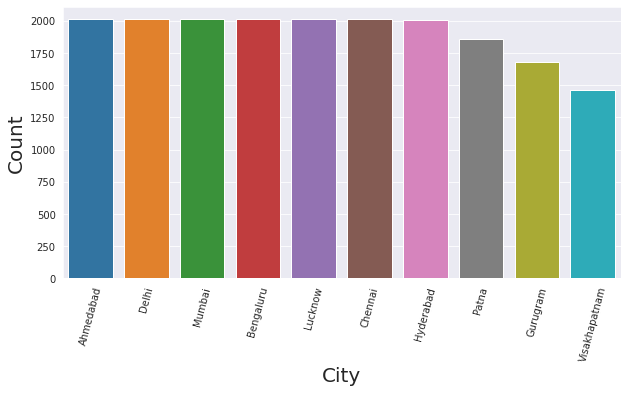

In [10]:
''' count of cities '''
city_label = df_city_day.City.value_counts().nlargest(10)

''' barplot '''
plt.figure(figsize=(10, 5))
plt.xticks(rotation=75)
sns.barplot(city_label.index, city_label)
plt.xlabel('City', fontsize=20)
plt.ylabel('Count', fontsize=20);

In [11]:
''' making date as index of data '''
# df.hea
df_city_day.index = pd.DatetimeIndex(df_city_day['Date'])
df_city_day.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00,0.02,0.00,166.463581,Moderate
2015-01-02,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68,5.50,3.77,166.463581,Moderate
2015-01-03,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80,16.40,2.25,166.463581,Moderate
2015-01-04,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43,10.14,1.00,166.463581,Moderate
2015-01-05,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01,18.89,2.78,166.463581,Moderate


In [12]:
''' dropping some columns '''
df_city_day.drop(['City' , 'PM2.5' , 'PM10','Benzene' , 'Toluene', 'Xylene'  ,'AQI' ,'AQI_Bucket'], axis=1, inplace=True)

In [13]:
''' after dropping some columns, data looks like '''
df_city_day.head()

,Date,NO,NO2,NOx,NH3,CO,SO2,O3
Date,,,,,,,,
2015-01-01,2015-01-01,0.92,18.22,17.15,23.483476,0.92,27.64,133.36
2015-01-02,2015-01-02,0.97,15.69,16.46,23.483476,0.97,24.55,34.06
2015-01-03,2015-01-03,17.40,19.30,29.70,23.483476,17.40,29.07,30.70
2015-01-04,2015-01-04,1.70,18.48,17.97,23.483476,1.70,18.59,36.08
2015-01-05,2015-01-05,22.10,21.42,37.76,23.483476,22.10,39.33,39.31


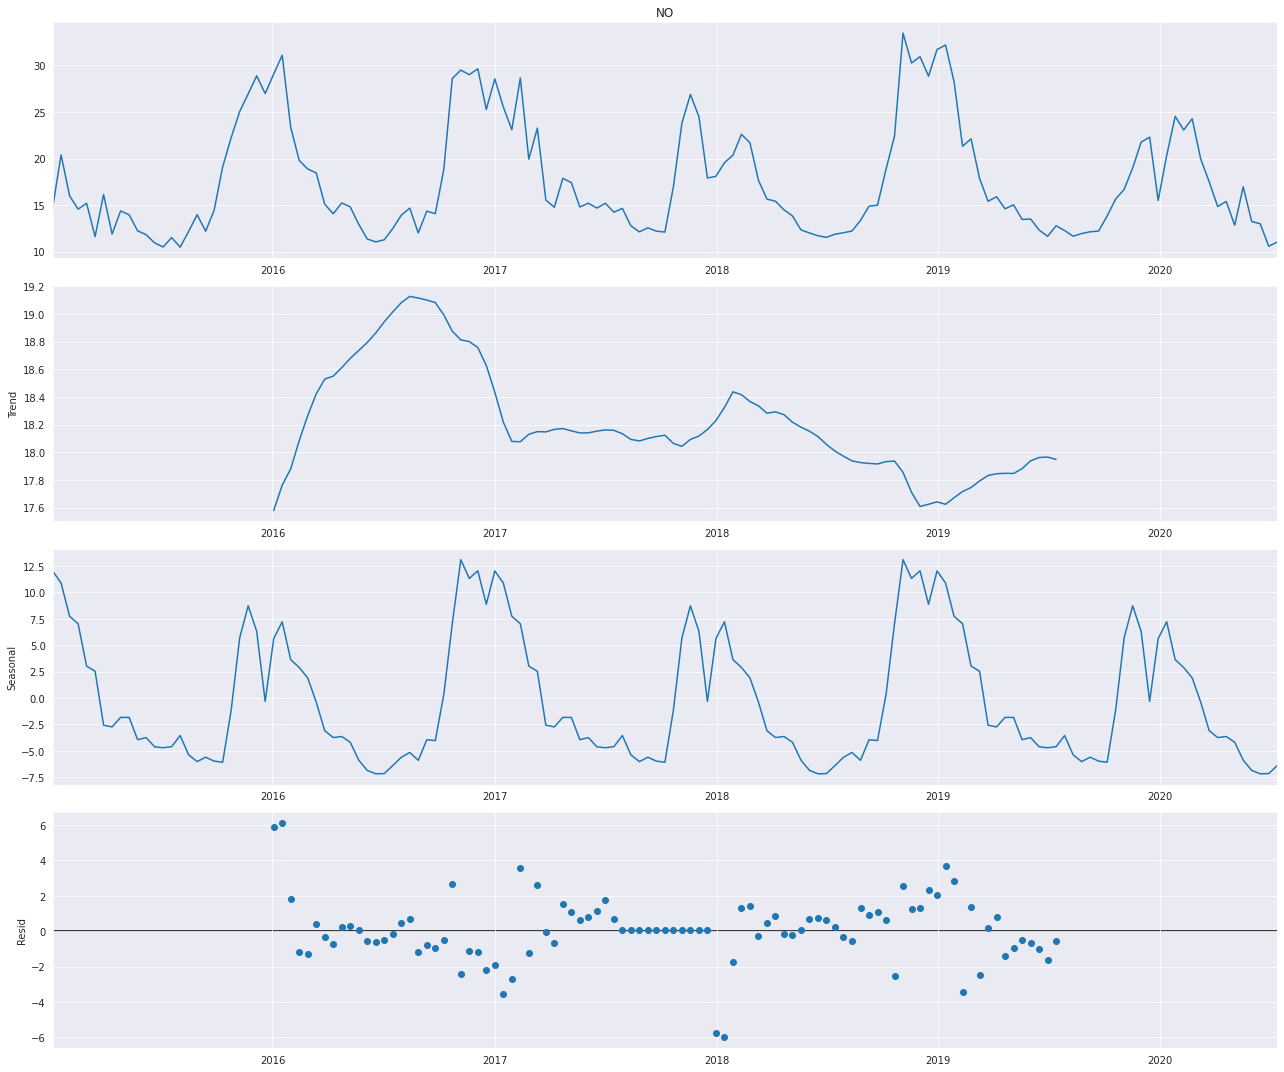

In [14]:
''' Considering the pollutant NO  '''
decomp_no = sm.tsa.seasonal_decompose(df_city_day['NO'].resample('2W').mean(), model='additive')
fig1 = decomp_no.plot()
plt.show()

In [15]:
''' SARIMA Model for NO '''

a = b = c = range(0, 3)
p = list(itertools.product(a, b, c))
seas_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(a, b, c))]
print('SARIMAX: {} x {}'.format(p[1], seas_pdq[1]))
print('SARIMAX: {} x {}'.format(p[1], seas_pdq[2]))
print('SARIMAX: {} x {}'.format(p[2], seas_pdq[3]))
print('SARIMAX: {} x {}'.format(p[2], seas_pdq[4]))

SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [16]:
for params in p:
    for p_seasonal in seas_pdq:
        try:
            m = sm.tsa.statespace.SARIMAX(df_city_day['NO'].resample('2W').mean(),order=param,seasonal_order=p_seasonal, 
                                          enforce_stationarity=False, enforce_invertibility=False)
            results = m.fit()
        except:
            continue

In [17]:
''' model '''
model = sm.tsa.statespace.SARIMAX(df_city_day['NO'].resample('2W').mean(), order=(2, 1, 1), seasonal_order=(1, 1, 0, 12),
                                  enforce_stationarity=False, enforce_invertibility=False)

res = model.fit()
print(res.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.26690D+00    |proj g|=  1.81036D-01

At iterate    5    f=  2.22170D+00    |proj g|=  1.36484D-01

At iterate   10    f=  2.18356D+00    |proj g|=  1.57012D-02

At iterate   15    f=  2.18295D+00    |proj g|=  3.47666D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     19      1     0     0   2.243D-05   2.183D+00
  F =   2.1829504367505743     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8449      0.107      7.897      0.000       0.635       1.055
ar.L2         -0.0304      0.088     -0.347      0.728      -0.202       0.141
ma.L1         -1.0000    186.400     -0.005      0.996    -366.337     364.337
ar.S.L12      -0.6792      0.067    -10.078      0.000      -0.811      -0.547
sigma2        12.0933   2254.571      0.005      0.996   -4406.785    4430.972


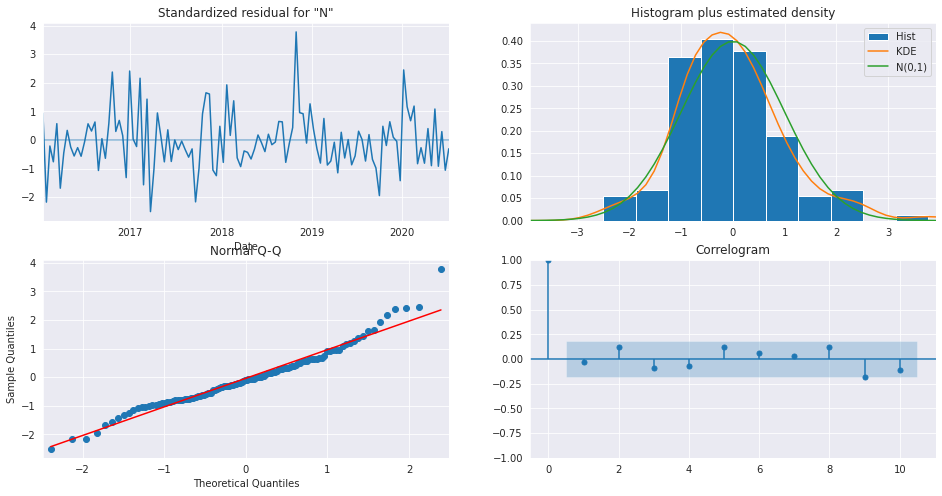

In [18]:
''' plotting '''
res.plot_diagnostics(figsize=(16, 8))
plt.show()

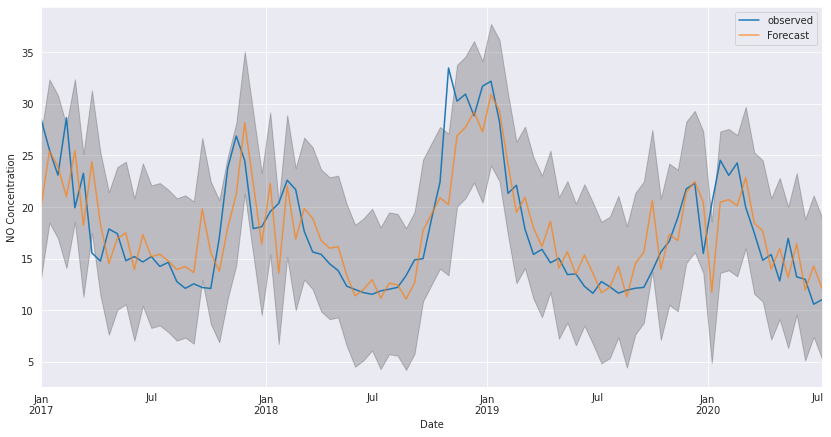

In [19]:
y_pred = res.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
y_pred_ci = y_pred.conf_int()

ax = df_city_day['NO'].resample('2W').mean()['2017':].plot(label='observed')
y_pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(y_pred_ci.index,
                y_pred_ci.iloc[:, 0],
                y_pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('NO Concentration')

plt.legend(['observed', 'Forecast'])
plt.show()

In [20]:
''' calculating mse and rmse '''

y_f = y_pred.predicted_mean
actual = df_city_day['NO'].resample('2W').mean()['2017-01-01':]
mse = ((y_f - actual) ** 2).mean()

print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 12.83
The Root Mean Squared Error of our forecasts is 3.58


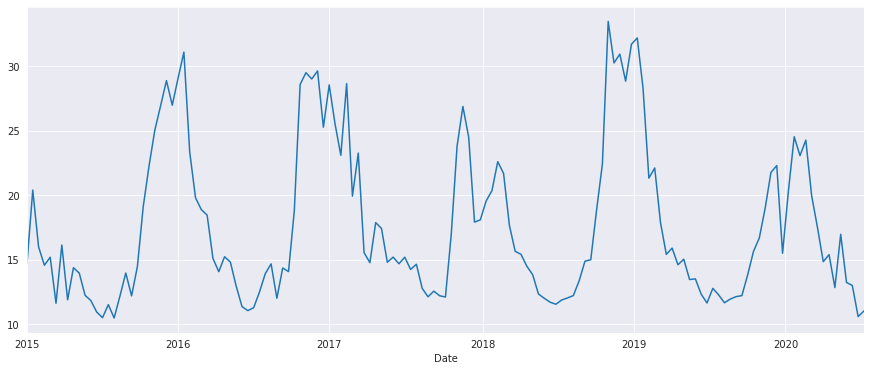

In [21]:
''' considering the pollutant SO2  '''

df_city_day['NO'].resample('2W').mean().plot(figsize=(15, 6))
plt.show()

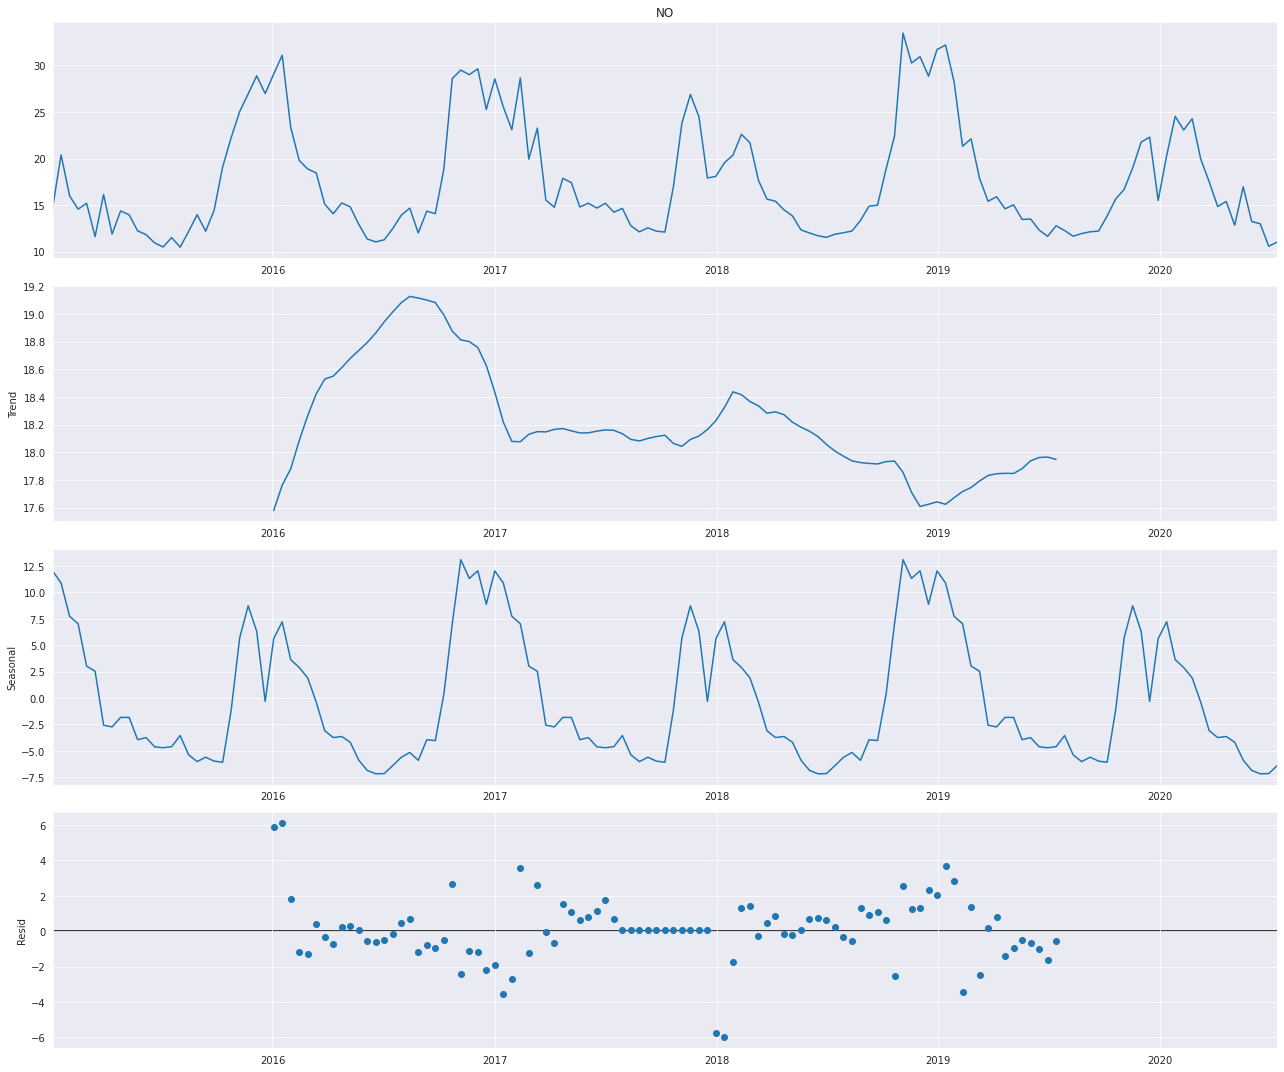

In [22]:
decomp_so2 = sm.tsa.seasonal_decompose(df_city_day['NO'].resample('2W').mean(), model='additive')
fig_so2 = decomp_so2.plot()
plt.show()

In [23]:
''' SARIMA for SO2 '''

a = b = c = range(0, 3)
p = list(itertools.product(a, b, c))
seas_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(a, b, c))]
print('SARIMAX: {} x {}'.format(p[1], seas_pdq[1]))
print('SARIMAX: {} x {}'.format(p[1], seas_pdq[2]))
print('SARIMAX: {} x {}'.format(p[2], seas_pdq[3]))
print('SARIMAX: {} x {}'.format(p[2], seas_pdq[4]))

SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [24]:
for params in p:
    for p_seasonal in seas_pdq:
        try:
            m = sm.tsa.statespace.SARIMAX(df_city_day['SO2'].resample('2W').mean(),order=param,seasonal_order=p_seasonal, 
                                          enforce_stationarity=False, enforce_invertibility=False)
            results = m.fit()
        except:
            continue

In [25]:
mod = sm.tsa.statespace.SARIMAX(df_city_day['SO2'].resample('2W').mean(), order=(2, 1, 1), seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.81410D+00    |proj g|=  7.76260D-02

At iterate    5    f=  1.80075D+00    |proj g|=  1.75139D-02

At iterate   10    f=  1.79904D+00    |proj g|=  3.28200D-02

At iterate   15    f=  1.79124D+00    |proj g|=  1.01990D-02


 This problem is unconstrained.


  ys=-4.942E-04  -gs= 3.799E-04 BFGS update SKIPPED

At iterate   20    f=  1.78265D+00    |proj g|=  5.90274D-02

At iterate   25    f=  1.78081D+00    |proj g|=  3.73799D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     46      1     1     0   1.422D-05   1.781D+00
  F =   1.7808077880175344     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0314      0.123      8.410      0.000       0.791       1.272
ar.L2     

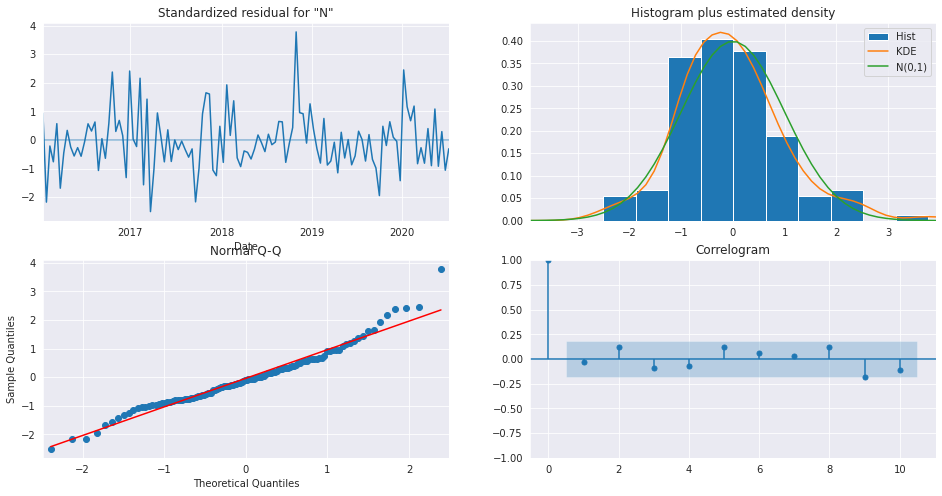

In [26]:
''' plotting '''
res.plot_diagnostics(figsize=(16, 8))
plt.show()

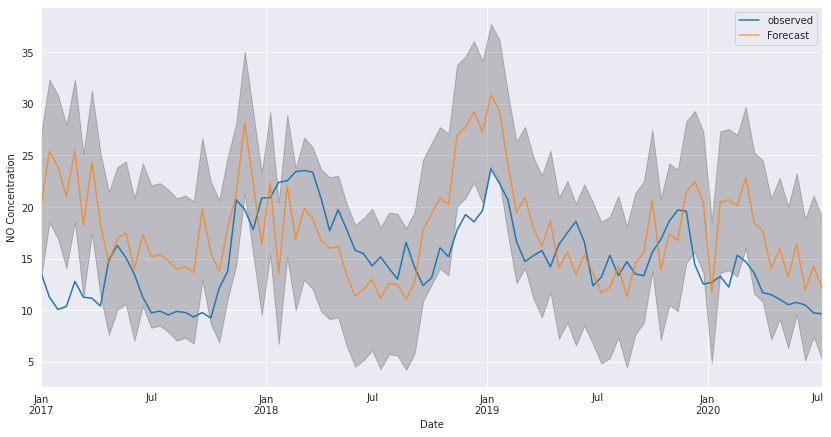

In [27]:
y_pred = res.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
y_pred_ci = y_pred.conf_int()

ax = df_city_day['SO2'].resample('2W').mean()['2017':].plot(label='observed')
y_pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(y_pred_ci.index,
                y_pred_ci.iloc[:, 0],
                y_pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('NO Concentration')

plt.legend(['observed', 'Forecast'])
plt.show()

In [28]:
''' calculating mse and rmse '''

y_f = y_pred.predicted_mean
actual = df_city_day['SO2'].resample('2W').mean()['2017-01-01':]
mse = ((y_f - actual) ** 2).mean()

print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 32.1
The Root Mean Squared Error of our forecasts is 5.67
